In [79]:
# Import libraries needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

In [80]:
# Upload data set
stop_and_search_df = pd.read_csv("2021-12-merseyside-stop-and-search.csv")
stop_and_search_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type                                      2936 non-null   object 
 1   Date                                      2936 non-null   object 
 2   Part of a policing operation              0 non-null      float64
 3   Policing operation                        0 non-null      float64
 4   Latitude                                  2806 non-null   float64
 5   Longitude                                 2806 non-null   float64
 6   Gender                                    2785 non-null   object 
 7   Age range                                 2782 non-null   object 
 8   Self-defined ethnicity                    2877 non-null   object 
 9   Officer-defined ethnicity                 2718 non-null   object 
 10  Legislation                         

In [81]:
stop_and_search_df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person and Vehicle search,2021-12-01T00:22:23+00:00,NaN,NaN,53.386456,-3.056396,Female,Oct-17,White - English/Welsh/Scottish/Northern Irish/...,White,NaN,NaN,A no further action disposal,NaN,False
1,Person and Vehicle search,2021-12-01T00:25:23+00:00,NaN,NaN,53.386456,-3.056396,Male,Oct-17,White - English/Welsh/Scottish/Northern Irish/...,White,NaN,NaN,A no further action disposal,NaN,False
2,Person and Vehicle search,2021-12-01T00:27:58+00:00,NaN,NaN,53.429291,-2.947949,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Misuse of Drugs Act 1971 (section 23),NaN,Arrest,NaN,False
3,Person search,2021-12-01T00:31:09+00:00,NaN,NaN,53.450024,-2.711851,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,Community resolution,NaN,False
4,Person search,2021-12-01T00:56:41+00:00,NaN,NaN,53.403024,-2.979358,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,NaN,NaN


In [82]:
# Begin cleaning the data set

# Delete columns that are not filled in
stop_and_search_df.drop(stop_and_search_df.columns[[2,3,11,13]], axis=1, inplace=True)

# Delete rows where data is missing
stop_and_search_df.dropna(inplace=True)
stop_and_search_df.drop_duplicates()
stop_and_search_df.head()

,Type,Date,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Outcome,Removal of more than just outer clothing
2,Person and Vehicle search,2021-12-01T00:27:58+00:00,53.429291,-2.947949,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Misuse of Drugs Act 1971 (section 23),Arrest,False
3,Person search,2021-12-01T00:31:09+00:00,53.450024,-2.711851,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Community resolution,False
5,Person search,2021-12-01T01:05:24+00:00,53.459508,-2.745491,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),A no further action disposal,False
6,Person search,2021-12-01T01:28:36+00:00,53.387767,-3.032957,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),A no further action disposal,False
7,Person search,2021-12-01T01:38:58+00:00,53.445658,-2.991360,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),A no further action disposal,False


In [83]:
# Check unique values of columns to check inputs are correct
# Can not do this with the other three columns as all inputs could be unique
stop_and_search_columns = ["Type", "Gender", "Age range", 
                           "Self-defined ethnicity",
                           "Officer-defined ethnicity", "Legislation", "Outcome",
                           "Removal of more than just outer clothing"]

for unique_column in stop_and_search_columns:
    print(stop_and_search_df[str(unique_column)].unique())

['Person and Vehicle search' 'Person search']
['Male' 'Female' 'Other']
['25-34' '18-24' 'over 34' 'Oct-17']
['Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background'
 'White - English/Welsh/Scottish/Northern Irish/British'
 'Other ethnic group - Not stated'
 'Mixed/Multiple ethnic groups - White and Asian'
 'Black/African/Caribbean/Black British - Caribbean' 'White - Irish'
 'White - Any other White background'
 'Asian/Asian British - Any other Asian background'
 'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background'
 'Black/African/Caribbean/Black British - African'
 'Mixed/Multiple ethnic groups - White and Black African'
 'Mixed/Multiple ethnic groups - White and Black Caribbean'
 'Other ethnic group - Any other ethnic group'
 'Asian/Asian British - Bangladeshi' 'Asian/Asian British - Indian'
 'Asian/Asian British - Pakistani']
['Black' 'White' 'Asian' 'Other']
['Misuse of Drugs Act 1971 (section 23)'
 'Police and Criminal Evidence

In [84]:
# We see from the above output that in the Age range column some dates were
# added. We will then remove these and check that they were removed.
stop_and_search_df.rename(columns={"Age range": "Age_range"}, inplace=True)

stop_and_search_df = stop_and_search_df[
    stop_and_search_df.Age_range != "Oct-17"]

print(stop_and_search_df["Age_range"].unique())

['25-34' '18-24' 'over 34']


In [85]:
# Now that the data is done being cleaned we will save it in csv format
stop_and_search_df.to_csv("2021-12-merseyside-stop-and-search_cleaned.csv",
                           index=False)

In [86]:
stop_and_search_df["Age_range"].value_counts()

over 34    803
18-24      702
25-34      622
Name: Age_range, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

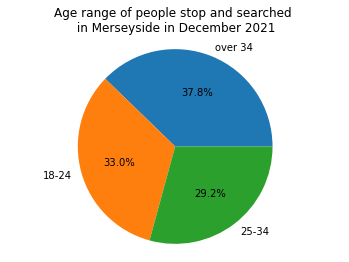

In [87]:
my_labels = "over 34", "18-24", "25-34"
plt.pie(stop_and_search_df["Age_range"].value_counts(),
 labels=my_labels,autopct="%1.1f%%")
plt.title("Age range of people stop and searched \n in Merseyside in December 2021")
plt.axis("equal")
plt.show


In [88]:
stop_and_search_df["Gender"].value_counts()

Male      1931
Female     196
Name: Gender, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

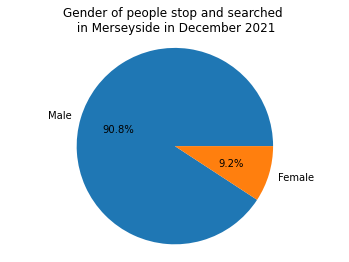

In [89]:
my_labels = "Male", "Female"
plt.pie(stop_and_search_df["Gender"].value_counts(),
 labels=my_labels,autopct="%1.1f%%")
plt.title("Gender of people stop and searched \n in Merseyside in December 2021")
plt.axis("equal")
plt.show